# Desenhando com o Open CV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
fundo = np.zeros(shape=(400,400,3),dtype=np.int16) #criar um fundo

In [3]:
fundo.shape

(400, 400, 3)

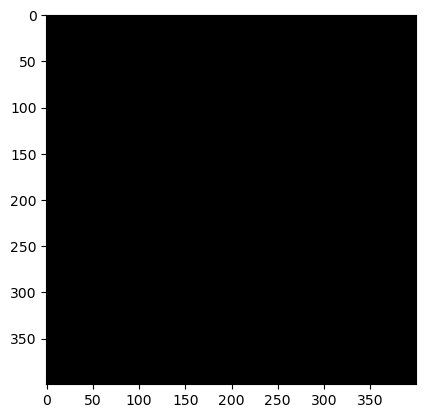

In [4]:
plt.imshow(fundo)

-----
# Formas Básicas
----

### Retângulos

* pt1 = Vértice superior do retangulo (esquerda acima).
* pt2 = Vértice oposto (direita abaixo).
* thickness = espessura. => se espessura for negativa a forma será preenchida!

In [5]:
cv2.rectangle(fundo,pt1=(100,10),pt2=(300,390),color=(30,100,0),thickness=5)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=int16)

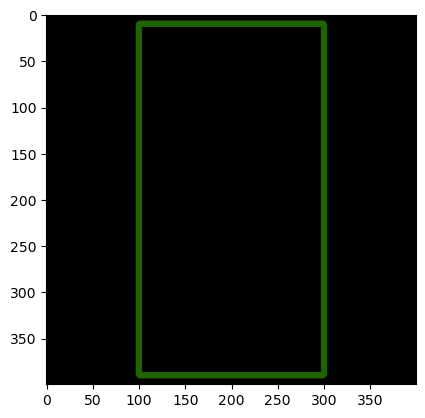

In [6]:
plt.imshow(fundo)

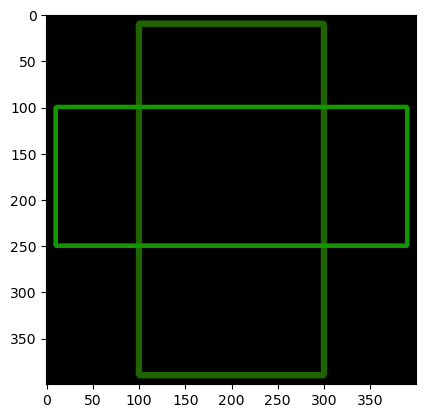

In [7]:
cv2.rectangle(fundo,pt1=(10,100),pt2=(390,250),color=(20,150,0),thickness=3)
plt.imshow(fundo)

## Círculos

* center = centro
* radius = raio

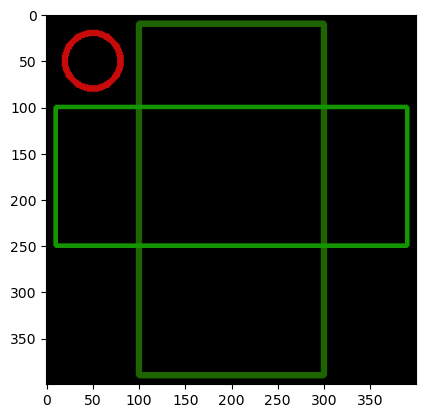

In [8]:
cv2.circle(img=fundo, center=(50,50), radius=30, color=(200,10,10), thickness=5)
plt.imshow(fundo)

## Para preencher, definir thickness = -1

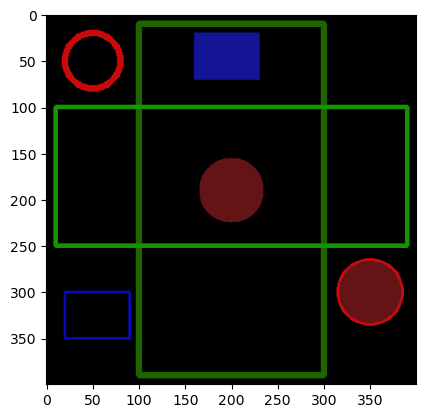

In [9]:
cv2.rectangle(fundo,pt1=(160,20),pt2=(230,70),color=(20,20,150),thickness=-1)
cv2.circle(img=fundo, center=(200,190), radius=35, color=(100,20,20), thickness=-1)
cv2.rectangle(fundo,pt1=(20,300),pt2=(90,350),color=(10,10,180),thickness=2)
cv2.circle(img=fundo, center=(350,300), radius=35, color=(100,20,20), thickness=-1) #preenchendo
cv2.circle(img=fundo, center=(350,300), radius=35, color=(200,10,20), thickness=2) #contorno
plt.imshow(fundo)

## linhas

* pt1 = ponto inicial (x, y)
* pt2 = ponto final (x, y)

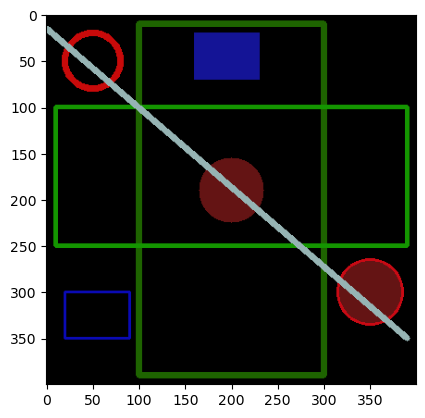

In [10]:
cv2.line(fundo,pt1=(0,15),pt2=(390,350),color=(150, 180, 180),thickness=5)
plt.imshow(fundo)

## Adicionar Texto
* org = ponto inferior esquerdo da primeira letra (x, y)
* fontScale = Tamanho da fonte

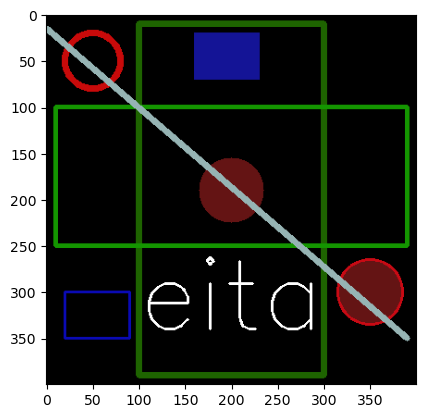

In [11]:
fonte = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(fundo,text='eita',org=(100,340), fontFace=fonte,fontScale= 3.5,color=(255,255,255),thickness=2,lineType=cv2.LINE_AA)
plt.imshow(fundo)

## Desenhar Polígonos

Para desenhar um polígono, primeiro você precisa ter as coordenadas dos vértices. Transforme esses pontos em um array com formato de LINHASx1x2, onde LINHAS é o número de vértices.

* o array deve ser do tipo int32, logo, nao serve para coordenadas geograficas, neste caso usar o matplotlib!

In [12]:
fundo = np.zeros(shape=(500,500,3),dtype=np.int32)

In [13]:
vertices = np.array([[150,200],[150,100], [250,200],[300,100], [400, 200], [250, 400]],np.int32)

In [14]:
pts = vertices.reshape((-1,1,2))

In [15]:
pts

array([[[150, 200]],

       [[150, 100]],

       [[250, 200]],

       [[300, 100]],

       [[400, 200]],

       [[250, 400]]])

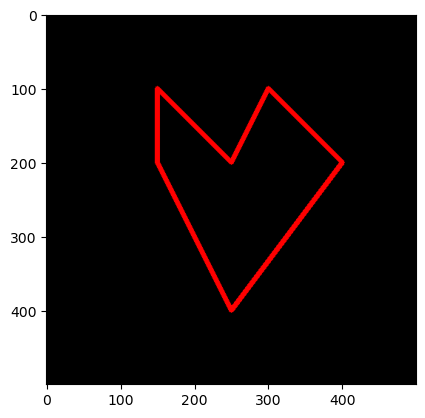

In [16]:
cv2.polylines(fundo,[pts],isClosed=True,color=(255,0,0),thickness=5)
plt.imshow(fundo)

# Desenhando com o mouse


### Pontos botão esquerdo

In [17]:
import cv2
import numpy as np
# funcao baseada no metodo CV2 Event (clique com o botao esquerdo)
def desenha_circulo(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(fundo,(x,y),50,(10,180,10),-1)

# criar um fundo para a imagem
fundo = np.zeros((500,500,3), np.uint8)
# criar uma janela, com um nome para referencia 
cv2.namedWindow(winname='meu_desenho')
# definir o callback do mouse
cv2.setMouseCallback('meu_desenho', desenha_circulo)

while True: #nao fecha no x, fecha no esc
    # mostrar a imagem
    cv2.imshow('meu_desenho',fundo)

    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()
# https://stackoverflow.com/questions/35372700/whats-0xff-for-in-cv2-waitkey1/39201163

### Pontos botões: esquerdo e direito

In [18]:
import cv2
import numpy as np


def desenha_circulo(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(fundo,(x,y),40,(0,255,0),-1)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(fundo,(x,y),60,(0,0,255),-1)
        

fundo = np.zeros((512,512,3), np.uint8)
cv2.namedWindow(winname='meu_desenho')
cv2.setMouseCallback('meu_desenho',desenha_circulo)

while True: 
    cv2.imshow('meu_desenho',fundo)

    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()


### Formas retangulares, clicar e arrastar

In [19]:
import cv2
import numpy as np


drawing = False # True se o botao estiver pressionado
ix,iy = -1,-1

def desenha(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        # posicao do cursor no momento do clique
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        # movimento do mouse com o botao pressionado
        if drawing == True:
            cv2.rectangle(img,(ix,iy),(x,y),(10,200,0),-1)
           

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        # soltou o botao, preenche o retangulo
        cv2.rectangle(img,(ix,iy),(x,y),(200,10,20),-1)
        
        

img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow(winname='meu_desenho')
cv2.setMouseCallback('meu_desenho',desenha)

while True: 
    cv2.imshow('meu_desenho',img)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()